## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
tot_usr = df.shape[0]
tot_usr

294478

c. The number of unique users in the dataset.

In [6]:
df.nunique()[0]

290584

d. The proportion of users converted.

In [7]:
#tot_usr_conv =
tot_usr_conv = df.groupby(["converted"]).count()['user_id'][1]/tot_usr
tot_usr_conv

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
a = df.groupby(["group","landing_page"]).count()
a

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [9]:
a["user_id"][-1] + a["user_id"][0]

3893

f. Do any of the rows have missing values?

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df.drop(df[(df.group == 'treatment') & (df.landing_page == 'old_page')].index,inplace=True)



In [12]:
df.drop(df[(df.group == 'control') & (df.landing_page == 'new_page')].index,inplace=True)



In [13]:
df2 = df

In [14]:
((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')).sum() == 290585

True

In [15]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) ]

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [16]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [17]:
df2.nunique()[0]

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [18]:
df2["dupl"] = df2.duplicated("user_id")

In [19]:
np.nonzero(df2.dupl)

(array([2862]),)

In [20]:
np.nonzero(df2.user_id==773192)

(array([1876, 2862]),)

c. What is the row information for the repeat **user_id**? 

In [21]:
df2.iloc[2862]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
dupl                                  True
Name: 2893, dtype: object

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [22]:
df2.drop_duplicates("user_id",inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [23]:
df2.converted.sum()/df2.converted.count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [24]:
df2.groupby(["group"]).sum()['converted'][0]/df2.groupby(["group"]).count()["user_id"][0]


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [25]:
df2.groupby(["group"]).sum()['converted'][1]/df2.groupby(["group"]).count()["user_id"][1]



0.11880806551510564

d. What is the probability that an individual received the new page?

In [26]:
df2.groupby("landing_page").count()["user_id"][0]/df2.count()[0]

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The new page lower the conversion by 0.157%. However, we need to investigate the statistical analaysis (confidence intervals and standard deviation) to conclude whether this is valid statistically**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

>Null : Pnew <= Pold

>Alternative : Pold < Pnew

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [27]:
pnew = df2.groupby(["converted"]).count()["user_id"][1]/df2.count()["user_id"]
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [28]:
pold = pnew
pold

0.11959708724499628

In [29]:
p_diff = pnew-pold

c. What is $n_{new}$, the number of individuals in the treatment group?

In [30]:
n_new = df2.query("group == 'treatment'").count()[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [31]:
n_old =  df2.query("group == 'control'").count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
new_page_converted = np.random.choice([0,1],size=n_new,p=[1-pnew,pnew])
new_page_converted

array([0, 0, 0, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted = np.random.choice([0,1],size=n_old,p=[1-pold,pold])
old_page_converted

array([0, 0, 0, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
pnew = np.sum(new_page_converted)/new_page_converted.shape[0]

pold = np.sum(old_page_converted)/old_page_converted.shape[0]

pnew - pold

0.00081017008235810539

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [35]:
p_diffs = []

n_new = df2.query("group == 'treatment'").count()[0]
n_old =  df2.query("group == 'control'").count()[0]

for _ in range(10000):
    new_page_converted = np.random.choice([0,1],size=n_new,p=[1-pnew,pnew])
    old_page_converted = np.random.choice([0,1],size=n_old,p=[1-pold,pold])
    pnew1 = np.sum(new_page_converted)/new_page_converted.shape[0]
    pold1 = np.sum(old_page_converted)/old_page_converted.shape[0]
    p_diffs.append(pnew1 - pold1)




    
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

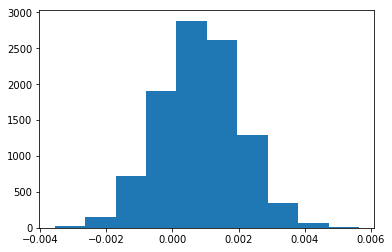

In [36]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
p_diffs

[0.00035581864702659283,
 0.0022210800609701181,
 0.00078271776341247434,
 0.0015950987656994653,
 -0.00022228139504806843,
 -0.00064197294657322712,
 0.001553609909594772,
 0.0016982649547210016,
 0.0010576383045220322,
 0.0017532957901330443,
 0.00057621655355107049,
 0.00098237294725650459,
 0.0011336386770775669,
 0.002103848343467149,
 0.0011613502125523978,
 0.00026660713731282981,
 -0.00022916834999110736,
 0.0026206138323774386,
 -0.0017432513391122673,
 0.0003488396020008,
 -0.0014197264671200055,
 0.0012574691416720324,
 0.0024551188583722822,
 0.0013884645368296561,
 0.00025951894848527668,
 0.00065879350336338349,
 0.0011953484120605234,
 0.00028717079594349493,
 0.00075529273041730072,
 0.00035586298669605665,
 -0.00016719087161944091,
 0.0029438215051957872,
 -0.00028411221143612164,
 -0.00093795852565281557,
 -0.00040099944381473407,
 -0.00028420771226266017,
 -0.0017846481051342344,
 0.00030109136781321377,
 0.0008996510408324776,
 0.00019767619449390095,
 0.00178075322

In [38]:
p_real_a = df2.query(('group=="control"')).converted.sum()/df2.query(('group=="control"')).converted.shape[0]

p_real_b = df2.query(('group=="treatment"')).converted.sum()/df2.query(('group=="treatment"')).converted.shape[0]

p_real_diff = p_real_b - p_real_a 


In [39]:
# What propition of the simulated is greater than actual difference?
np.sum(p_real_diff<p_diffs)/(p_real_diff<p_diffs).shape[0]

0.97699999999999998

In [40]:
# Prepare for null plot
p_diffs = np.array(p_diffs)
null_valls = np.random.normal(0,p_diffs.std(),p_diffs.size)

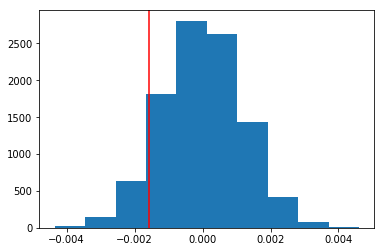

In [41]:
# A visual representation
plt.hist(null_valls)
plt.axvline(p_real_diff,color='r');

In [49]:
#p_value 
(null_valls>p_real_diff).mean()

0.90849999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

what I have computed in part j was the p-value. In my case it was much higher than 0.05. Thus, we should accept the null hypothesis that the old page is better. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [50]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'").converted.sum()
convert_new = df2.query("group == 'treatment'").converted.sum()
n_old = df2.query("group == 'control'").count()[0]
n_new = df2.query("group == 'treatment'").count()[0]

In [51]:
convert_old, convert_new

(17489, 17264)

In [52]:
n_old,n_new

(145274, 145310)

In [53]:
df.head()

,user_id,timestamp,group,landing_page,converted,dupl
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [75]:
count = np.array([convert_old,convert_new]) 
nobs = np.array([n_old,n_new])
#value = 0.05

stat, pval = sm.stats.proportions_ztest(count,nobs,alternative='smaller')



In [76]:
stat, pval

(1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The z-score indicate how many standard deviation from the mean the data is. Assuming a normal distrubtion, the current z-value, 1.31, shows that our data is between 1-2 standard deviation above the mean, and the p-value is 0.9 which means it's higher than 90% of the data.  

Yes, the p-values in part j and k are the same. They both lead to the same conclusion to accept the null hypothesis since p-value > 0.05. The old page is BETTER. 



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Initially, I thought I was going to use linear, but realized that the conversion has only two outputs (0 or 1). In such conditions, logistic regression is reccomended for categorical dataset. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [59]:
df2["ab_page"] =pd.get_dummies(df['group'])["treatment"]
df2 = df2.drop(["group"],axis=1)

In [61]:
df2["intercept"] = 1

In [63]:
df2.head(5)

,user_id,timestamp,landing_page,converted,dupl,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,old_page,0,False,0,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,False,0,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,False,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,False,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [67]:
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [68]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        02:45:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [72]:
# relationship between the ab_page and conversion 
1/np.exp(-0.0150)

1.0151130646157189

> Given the new page, it's 1.015 less likely to have conversion, holding everything constant.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  




**Put your answer here.**

> The p-value is 0.190. 

> It differs from part II because the null hypothesis difinition is different for A/B testing and regression.
>> For A/B testing, it's the current model is better or equal to the proposed model

>> For linear regression, it suggests that there is no relationship between the independent variable (X) and the dependent variable (Y) (slope is zero). Thus, the p-value in this case represents a different thing due to different definition of the null hypothesis 



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [77]:
df2.head()

,user_id,timestamp,landing_page,converted,dupl,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,old_page,0,False,0,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,False,0,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,False,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,False,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,False,0,1


**Put your answer here.**

It'd be a great idea to include more factors into the logistic regression so that we have mutiplie logistic regression for the following reasons:

- The time of the day may matter whether people pay attention to certain visual cues or not. Maybe people at night tend to look at certain things, thus the webstie should automatically give the night mode to the user.
- Different langauges and cultures also have different ways of organaizing things. For examlpe, in Arabic, the writing start from right to left, which means Arabic speaking users tend to look at the website from right to left. The website design should take this into consideration.
- Sometimes having just one factor can be over-simplification to the studied problem. Including necessary factors can increase the quality and accuracy of the model.

The only disadvantage that I would see from including additional terms is that it can over-complicate the system and gonna lead to over-fitting. This problem arises in machine learning when we incldure a lot more features than we should for ths system. It is going to lose the generality and going to be very specific to the studied case.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [109]:
country = pd.read_csv("countries.csv")
country.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [110]:
# Notice we have three countries
country.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [111]:
# just to insure we don't have missing data 
assert country.shape[0]== df2.shape[0]

In [112]:
df2_country = pd.merge(df2,country,on='user_id')


In [113]:
df2_country[["CA","UK","US"]] = pd.get_dummies(df2_country['country'])

In [114]:
df2_country = df2_country.drop(['country','CA'], axis=1)


In [115]:
log_mod = sm.Logit(df2_country['converted'], df2_country[['intercept', 'ab_page', 'UK','US']])
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        05:08:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [118]:
# converted, UK, US 
1/np.exp(-0.0149), np.exp(0.0506), np.exp(0.0408)

(1.0150115583846535, 1.0519020483004984, 1.0416437559600236)



> The ab_page coef did not change. It's still going to be LESS likely 1.015X to convert holding everything else constant

> The UK coef is 1.052X is MORE likely to convert holding everything else constant

> The US coef is 1.0416X is MORE likely to convert holding everything else constant


For the Null hypothesis, the p-values for ab_page, UK, and US is greater than alpha = 0.05. Thus, accept the null hypothesis that the new page is not better in terms of conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [123]:
# A good way to gauge whether one variable affect the other is to look at their correlation
df2_country.corr()

,user_id,converted,dupl,ab_page,intercept,UK,US
user_id,1.000000,0.001769,NaN,-0.001745,NaN,-0.002060,0.001187
converted,0.001769,1.000000,NaN,-0.002432,NaN,0.001772,-0.000237
dupl,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ab_page,-0.001745,-0.002432,NaN,1.000000,NaN,-0.002092,0.001216
intercept,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UK,-0.002060,0.001772,NaN,-0.002092,NaN,1.000000,-0.881979
US,0.001187,-0.000237,NaN,0.001216,NaN,-0.881979,1.000000


> As we can see for both ab_page - UK & ab_page - US both have very low correlation (-0.002092, 0.001216). It's almost zero which is no-relationship exist. This result also agrees with the p_values obtaiend earlier for these variables.


# Conclusion

> From both A/B testing as well as logistic regression, we should accept the old page as a better option for higher conversion rates. 


## Refrences

1- http://www.biostathandbook.com/multiplelogistic.html

2- http://www.biostathandbook.com/simplelogistic.html

3- https://study.com/academy/lesson/what-is-a-null-hypothesis-definition-examples.html

4- https://www.dummies.com/education/math/statistics/what-a-p-value-tells-you-about-statistical-data/

5- https://www.khanacademy.org/math/ap-statistics/tests-significance-ap/idea-significance-tests/v/p-values-and-significance-tests



<a id='conclusions'></a>


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [126]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0